In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
workdir = Path("/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/data/test_10k_each_6trees_IDs_charge_wSmear")
workdir.mkdir(parents=True, exist_ok=True)
tot_leaves = np.load(workdir / 'leaves.npy')
tot_SA = np.load(workdir / 'is_left_arr.npy')
tot_global_tag = np.load(workdir / 'global_tag.npy')

#pion momenta all modes

pi_p = []
mode = []
pi_p_wBG = []
mode_wBG = []

for i in range(len(tot_leaves)):
    for j in range(len(tot_global_tag[1])):
        
        # filter for non-background pions and non deleted FSPs
        tag = tot_global_tag[i][j]
        if str(tag).find("pi") != -1 and str(tag).find("BG") == -1 and str(tag).find("DELETED") == -1:
            #print(tag)
            pi_p.append(np.sqrt((tot_leaves[i][j][0:3]**2).sum(axis=0))) # this is the momentum
            mode.append(tot_global_tag[i,-1])
            
        # here extra with BG
        if str(tag).find("pi") != -1 and str(tag).find("DELETED") == -1:
            pi_p_wBG.append(np.sqrt((tot_leaves[i][j][0:3]**2).sum(axis=0))) # this is the momentum
            mode_wBG.append(tot_global_tag[i,-1])
            



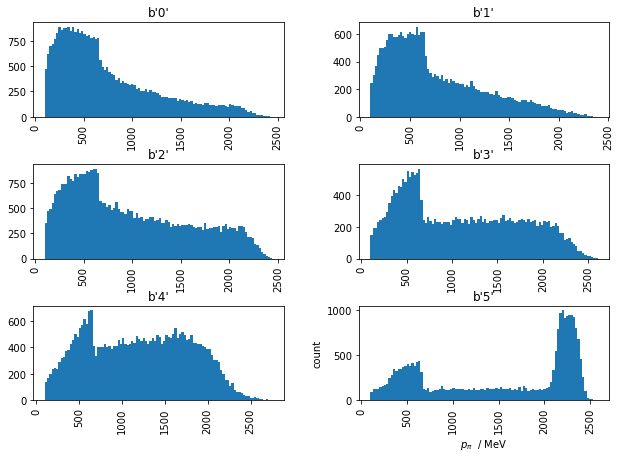

In [3]:
df = pd.DataFrame({"pi_p_wBG" : pi_p_wBG,"mode_wBG" : mode_wBG})

#df.hist('Mbc', bins=100, range=(4.3, 5.3), by='isSignal')
df.hist('pi_p_wBG', bins=100, by='mode_wBG', figsize=(10,7))


plt.xlabel(r'$p_{\pi}$  / MeV')
plt.ylabel('count')
plt.savefig('pi_p_wBG_allModes.png')

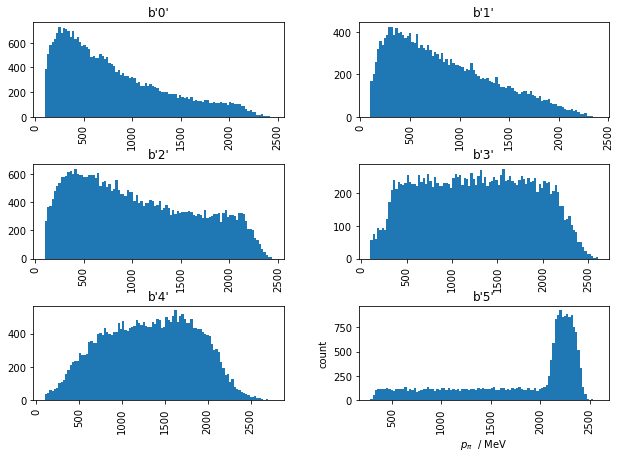

In [4]:
df = pd.DataFrame({"pi_p" : pi_p,"mode" : mode})

#df.hist('Mbc', bins=100, range=(4.3, 5.3), by='isSignal')
df.hist('pi_p', bins=100, by='mode', figsize=(10,7))


plt.xlabel(r'$p_{\pi}$  / MeV')
plt.ylabel('count')
plt.savefig('pi_p_allModes_noBG.png')

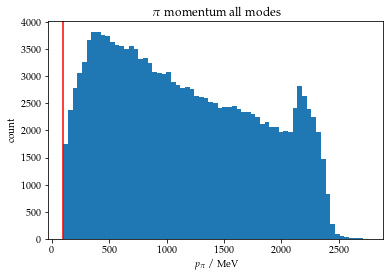

In [5]:
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

_ = plt.hist(pi_p, bins='auto')  # arguments are passed to np.histogram
plt.title(r'$\pi$ momentum all modes')
plt.axvline(100, 0, 1, label='pyplot vertical line', c="r")
plt.ylabel('count')
plt.gca().set_xlabel(r'$p_{\pi}$  / MeV')
#plt.xlabel(' ')
plt.show()

In [6]:
min(pi_p)

100.00645452174463

In [7]:


for mode in range(6):
    
    events_in_mode = 0
    pi_p = []
    for i in range(len(tot_leaves)):
        
        if str(tot_global_tag[i][-1]).find(str(mode)) != -1:
            events_in_mode += 1
            for j in range(len(tot_global_tag[1])):
                #print(str(tot_global_tag[i][j]))
                if str(tot_global_tag[i][j]).find("pi") != -1:

                    pi_p.append(np.sqrt((tot_leaves[i][j][0:3]**2).sum(axis=0))) # this is the momentum
        
        
    pi_p = np.array(pi_p)
    print("mode:",mode, "percentage pions w/ p below 100MeV:",round(100*(len(pi_p[pi_p < 100.0])/len(pi_p)),2))

mode: 0 percentage pions w/ p below 100MeV: 4.0
mode: 1 percentage pions w/ p below 100MeV: 3.48
mode: 2 percentage pions w/ p below 100MeV: 3.28
mode: 3 percentage pions w/ p below 100MeV: 2.85
mode: 4 percentage pions w/ p below 100MeV: 2.28
mode: 5 percentage pions w/ p below 100MeV: 2.42


In [8]:
pi_p = []
for i in range(len(tot_leaves)):
    events_in_mode += 1
    for j in range(len(tot_global_tag[1])):
        #print(str(tot_global_tag[i][j]))
        if str(tot_global_tag[i][j]).find("pi") != -1:

            pi_p.append(np.sqrt((tot_leaves[i][j][0:3]**2).sum(axis=0))) # this is the momentum



pi_p = np.array(pi_p)
print("fraction of pions below 100MeV (all modes):",round(len(pi_p[pi_p < 100.0])/len(pi_p),4)*100,"%")

fraction of pions below 100MeV (all modes): 3.09 %


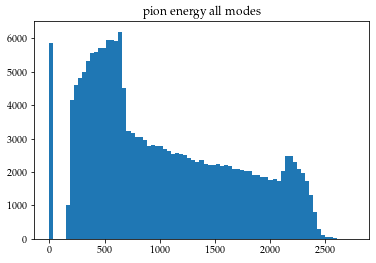

In [9]:
#pion energy all modes

gammaE = []
for i in range(len(tot_leaves)):
    for j in range(len(tot_global_tag[1])):
        #print(str(tot_global_tag[i][j]))
        if str(tot_global_tag[i][j]).find("pi") != -1:
            #print(tot_leaves[i][j][3])
            gammaE.append(tot_leaves[i][j][3]) # this is the energy
            
            
            
import matplotlib.pyplot as plt
_ = plt.hist(gammaE, bins='auto')  # arguments are passed to np.histogram
plt.title("pion energy all modes")

#plt.axvline(100, 0, 1, label='pyplot vertical line', c="g")

plt.show()

In [10]:
print(len(tot_leaves))
print(len(tot_SA))
print(len(tot_global_tag))

60000
60000
60000


In [11]:
(tot_global_tag[:,-1] == b'0').shape

(60000,)

In [12]:
tot_leaves[tot_global_tag[:,-1] == b'0'][tot_global_tag[tot_global_tag[:,-1] == b'0',0:-1] == b'pi+_1'].shape

(9680, 7)

In [13]:
(tot_global_tag[tot_global_tag[:,-1] == b'0',0:-1] == b'pi+_1').shape

(10000, 11)

In [14]:
#names = [b'pi+_1', b'gamma_1', b'K-_1'] # D0* in mode 5
names = [b'pi+_1',b'gamma_1',b'gamma_2'] # rho in mode 0
liste = []

mode_num = b'0'
num_leaves = len(tot_leaves[0])

summe = np.zeros(shape=(len(tot_global_tag),4))
for name in names:
    
    # selects leaves from mode "mode_num" with glob_tag "name"
    one =tot_leaves[tot_global_tag[:,-1] == mode_num][tot_global_tag[tot_global_tag[:,-1] == mode_num,0:-1] == name]
    
    
    #print(one.shape)
    #one = one.reshape(one.shape[1])
    #print(one)
    summe = summe + one[:,0:4]
    
mass =  np.sqrt(summe[:,3]**2 - (summe[:,0:3]**2).sum(axis=1))


import matplotlib.pyplot as plt
_ = plt.hist(mass, bins='auto')  # arguments are passed to np.histogram
plt.title("mass rho")


plt.show()

ValueError: operands could not be broadcast together with shapes (60000,4) (9680,4) 

In [ ]:
names = [b'pi+_1',b'gamma_1',b'gamma_2'] # rho in mode 0
liste = []

mode_num = 0
num_leaves = len(leaves_list[mode_num][0])

summe = np.zeros(shape=(len(global_tag_list[mode_num]),4))
for name in names:
    #print(name)
    #print(global_tag_list[5][:,0:4] == name)
    one = leaves_list[mode_num][:][global_tag_list[mode_num][:,0:num_leaves] == name]
    #print(one.shape)
    #one = one.reshape(one.shape[1])
    #print(one)
    summe = summe + one[:,0:4]
    
mass =  np.sqrt(summe[:,3]**2 - (summe[:,0:3]**2).sum(axis=1))


import matplotlib.pyplot as plt
_ = plt.hist(mass, bins='auto')  # arguments are passed to np.histogram
plt.title("mass rho")


plt.show()